<br>

<img src="https://lindas.admin.ch/static-assets/img/lindaslogo.png" style="width:15%; float:right">

# Tutorial *version.link* und *historisiertes Gemeindeverzeichnis*

Version vom 19.05.2023

## Einführung

Dieses Tutorial ist dazu gedacht, eine Einführung in zwei verschiedene, aber zusammenhängende Themen zu geben:

1. das **historisierte Gemeindeverzeichnis**
2. das **version.link Schema**

Der Grund für dies Verknüpfung ist, dass das historisierte Gemeindeverzeichnis das version.link Schema verwendet. Dieses Tutorial zeigt dabei sowohl die grundlegenden Mechanismen des version.link Schemas auf, als auch die Arbeit mit dem historisierten Gemeindeverzeichnis. Das Tutorial ist also von Interesse für Personen, die sich über version.link informieren möchten - und das passiert hier anhand des historisierten Gemeindeverzeichnisses, aber auch für Personen, die sich primär für das historisierte Gemeindeverzeichnis interessieren, dafür aber über grundlegende Kenntnisse von version.link verfügen müssen.

## version.link Schema

Das version.link Schema wurde dazu entworfen, Daten, die in einem hierarchischen Zusammenhang stehen inklusive deren zeitlichen Entwicklung zu modellieren. Die Dokumentation von version.link ist unter https://version.link zu finden.

## Das historisierte Gemeindeverzeichnis

Gemeinden in der Schweiz unterliegen Veränderungen. Aktuell sind das primär Fusionen zwischen einzelnen Gemeinden. Das historisierte Gemeindeverzeichnis gibt sowohl einen Überblick über alle aktuell existierenden Gemeinden als auch über Gemeinden im Verlaufe der Zeit. Im historischen Gemeindeverzeichnis sind also auch solche Gemeinden zu finden, die heute nicht mehr existieren, weil sie fusioniert haben.

## Zielpublikum

Das Zielpublikum dieses Tutorials sind Personen, die über gute Grundkenntnisse in der Informatik verfügen, die aber noch wenig Knowhow zum Thema Linked Data, SPARQL und version.link besitzen.

## Interaktives Notebook

Dieses Tutorial ist ein sogenanntes **interaktives JupyterLite Notebook**. In diesem Notebook können Sie den Inhalt der einzelnen Zellen interaktiv ändern und diese Zellen direkt ausführen, um das Ergebnis Ihrer Änderungen sofort zu sehen. Die Zellen enthalten entweder [Markdown](https://en.wikipedia.org/wiki/Markdown)-Inhalt (wie diese Zelle) oder ausführbaren Python-Quellcode. Dies ist für ein Tutorial sehr hilfreich, weil Inhalte beliebig mit ausführbarem Quellcode kombiniert werden können. Es können also Abfragen gezeigt werden, diese erklärt werden und darauf weiter aufgebaut werden.

**Um direkt loslegen zu können klicken Sie oben im Menu auf Run -> Run All Cells.**  
**Einzelne ausgewählte Zellen können sie danach abändern und mit dem "Play-Button" erneut ausführen und so Abfragen individuell anpassen.**

Das Notebook startet mit einem [Setup](#Setup) der Programierumgebung. Danach folgt eine [Kürzest-Einführung in Linked Data](#Linked-Data-Einführung). Danach folgt das eigentliche [Tutorial](#Tutorial).

*Zusätzliche Informationen zu JupyterLite:*  
JupyterLite is ein spezielles Jupyter Notebook mit dem Vorteil, vollständig browserbasiert zu sein, ohne eine aufwändige Backend-Infrastruktur zu benötigen. Der Nachteil ist, dass die erstmalige Ausführung der Zellen einige Zeit in Anspruch nehmen kann, weil eine erhebliche Menge von Daten geladen werden muss. Dass eine Zelle noch in Ausführung ist, ist am `[*]` links neben der Zelle erkennbar. Nach Abschluss der Ausführung erscheint statt eines `*` eine Zahl. Vor der ersten Ausführung ist eine leere Klammer `[]` zu sehen. Nachfolgende, wiederholte Ausführungen von Zellen werden aufgrund der gespeicherten Daten in Ihrem Browser viel schneller sein. 

**Speicherung von Änderungen**
Wenn Sie Änderungen am Tutorial vornehmen, werden diese Änderungen beim Sichern des Notebooks über File -> Save Notebook lokal in den Browser-Daten gespeichert. Bei einem späteren Öffnen des Notebooks werden wiederum die Änderungen aus den Browser-Daten geladen. Um wieder zur Ursprüngsversion des Tutorials zurückzukehren, gibt es die Möglichkeit, Ihr geändertes Notebook im File Browser (in der linken Seitenleiste das Ordner-Symbol) umzubenennen. Damit wird automatisch das ursprüngliche Notebook unter dem ursprünglichen Namen wieder neu vom Server geladen. Das gleiche passiert auch, wenn Sie das Notebook im File Browser einfach löschen. Ein Arbeiten in einem Chrome-Inkognito Fenster verhindert, dass Änderungen überhaupt persistent gespeichert werden.

Wenn Sie mehr über die Handhabung von Jupyter Notebooks wissen wollen, finden Sie hier zwei nützliche Ressourcen:

- [Die JupyterLab Interface](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)
- [Das Jupyter Notebook](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html)

## Setup

Eine SPARQL Abfrage ist nichts anderes als ein POST-Request an den entsprechenden Triple Store Datenbank Server. Um diese Requests und die erhaltenen Antworten einfacher handhaben zu können, enthält dieses Notebook vorbereiteten Python Code, der nachfolgend importiert wird. Zusätzlich werden verschiedene weitere Module importiert, welche das Arbeiten mit den Daten unterstützen. 

In [1]:
%pip install -q ipywidgets==8.0.4 ipycytoscape networkx nbformat plotly
import ipycytoscape as cy
import networkx as nx
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from ext.sparql import query, display_result

# Linked Data Einführung

Linked Data beschreibt ein **Framework für den Umgang mit Daten**, die sowohl für Menschen nützlich sein sollen, als auch maschinenlesbar sind inkl. einer von Computern verarbeitbaren Semantik. Also sowohl Menschen als auch Computer sollen die Daten "verstehen" und interpretieren können. 

## RDF

Das für Linked Data verwendete Datenformat ist RDF (Resource Description Framework). Das bedeutet, dass die Daten nicht als Tabellen (wie beispielsweise in relationalen Datenbanken) sondern als **Triples** abgespeichert werden. Triples folgen der grammatikalischen Struktur **Subjekt -> Prädikat -> Objekt** und können auch als grammatikalischer Satz verstanden werden. 

Die Information "**Der Apfel ist grün**" wird also mit dem Tripel **Apfel -> ist -> grün** ausgedrückt. Alle Teile eines Triples sind dabei durch weitere Eigenschaften definiert und beschrieben die wiederum in Form von Triples beschrieben sind. Diese vielseitigen Verknüpfungen führen zu einer Netzwerkstruktur, zu einem sogenannten Graphen.

Nachfolgendes Bild aus dem [W3C Primer für RDF](https://www.w3.org/TR/rdf11-primer/) veranschaulicht diese Zusammenhänge:

![](https://www.w3.org/TR/rdf11-primer/example-graph.jpg)

## URI

Eine weitere wichtige Eigenschaft von Linked Data ist, dass alle Teile eines Triples, also Subjekt, Prädikat und Objekt weltweit eindeutig identifizierbar sind. Dafür werden URIs (Universal Resource Identifier) eingesetzt. Die URI https://ld.admin.ch/municipality/351 beispielsweise ist der weltweit eindeutige Identifier für die Stadt Bern (die Nummer 351 ist die vom BFS vergebene Nummer für die Stadt Bern). Typischerweise lassen sich URIs **dereferenzieren**, das heisst, ein Request auf die entsprechende URI (bspw. in dem man sie in die Adresszeile eines Browsers eintippt) führt zu einer Website, die Infos zur entsprechenden URI enthält. Im Falle der URI der Stadt Bern wird man auf eine Webpage weitergeleitet, die diverse Informationen zur Stadt Bern enthält.

Während Prädikate immer URIs sind, können die Objekte auch sogeannte **Literals** sein, also reine Stringwerte (Zahlen und Buchstaben), die eine Information transportieren, aber die nicht dereferenzierbar sind. Solche Literals können beispielsweise Kalenderdaten sein oder Identifier, Namen, etc.

## SPARQL

SPARQL ist eine Query-Sprache für Linked Data Triple Stores ähnlich wie es SQL für relationale Datenbanken ist. Mit Hilfe von SPARQL können Daten nicht nur abgefragt werden, sondern diese können auch gleich weiter aufbereitet werden: Resultate können bspw. gruppiert, summiert oder gemittelt werden. SPARQL Abfragen (engl. Queries) können entweder direkt über ein eigenes Web-Interface eingegeben werden oder als HTTP-POST Request an einen sogenannten SPARQL-Endpoint geschickt werden.

Für die LINDAS Daten gelten folgende URLs:

- SPARQL Web-Interface von LINDAS: https://ld.admin.ch/sparql
- SPARQL-Endpoint: https://ld.admin.ch/query

Die HTTP-POST Requests Methode erlaubt es, eigene Anwendungen zu bauen, die automatisch aktuelle Daten von LINDAS abfragen können. Für dieses Tutorial verwenden wir diese Methode. Die eigentlichen Abfragen sind jedoch in beiden Fällen identisch.

### Pattern Matching

SPARQL Queries sind Aufträge an den Computer, bestimme Muster (Pattern) in den Daten zu finden (matching). Es können also mit Hilfe von SPARQL Muster vorgegeben werden, und die Datenbank gibt alle Triples zurück, die dieses Muster erfüllen. Einzelne Positionen der Triples können dabei bei einer Abfrage bewusst undefiniert gelassen und mit einer Variable bezeichnet werden. Variablen beginnen mit `?` und werden bei der Abfrage durch alle möglichen Elemente gefüllt, die dieses Pattern erfüllen. 

Eine ausführlichere Anleitung zum Pattern Matching ist [hier](https://programminghistorian.org/en/lessons/retired/graph-databases-and-SPARQL#rdf-in-brief) zu finden. 

### Prefixes

Um immer wiederkehrende URI kompakter zu notieren, werden sogenannte Prefixes verwendet, im nachfolgenden werden folgende Prefixes benutzt:

```
PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>
PREFIX purl: <http://purl.org/dc/terms/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
```

### Aufbau von SPARQL Queries

SPARQL Queries folgen einem grundlegenden Aufbau, der immer gleich lautet:

```
SELECT * WHERE 
{
    ?subject ?predicate ?object.   
}
```

Nach dem Schlüsselwort `SELECT` folgen die Variablen, die als Resultat angezeigt werden sollen, ein `*` bedeutet, dass alle in der Query vorkommenden Variablen angezeigt werden sollen. Nach dem Schlüsselwort `WHERE` und innerhalb von  geschweiften Klammern `{}` folgen nun die einzelnen Pattern, die das zurückgegebene Resultat erfüllen soll. Jedes Pattern wird dabei von einem `.` abgeschlossen.

Die oben gezeigte Abfrage ist die "universelle" Abfrage, die immer funktioniert, weil sie gar keine Vorgaben an das Pattern macht und auf allen drei Positionen des Triples eine Variable (bezeichnet durch das `?` vor dem Variablenname) beinhaltet. Somit gibt eine solche Abfrage alle Triples der Datenbank zurück (weil ja die Daten in einem Triple Store als Triples vorliegen). Diese Abfrage muss somit noch mit einem `LIMIT` versehen werden, das die zurückgegebene Anzahl von Resultaten beschränkt.

### Die ersten SPARQL Queries

Um im JupyterLite Notebook dieses Tutorials eine neue SPARQL Abfrage zu erstellen, erzeugen Sie eine neue Zelle für Code ("Plus-Zeichen" in der Titelzeile des aktuellen Tabs drücken und im Dropdown "Code" auswählen. Danach können Sie mit dem Python Befehl `await query(query_string, triple_store)` die Abfrage ausführen, welche als Resultat ein Pandas Dataframe zurückgibt, welches sinnvollerweise einer Variable zugewiesen wird. Das Schlüsselwort `await` ist notwendig, weil die Abfrage asynchronen Code enthält. Die Anzeige des Dataframes erfolgt mit dem Befehl `display_result(df)`, welcher dafür sorgt, dass die URI im Dataframe als klickbare Links dargestellt werden. Die dreifachen Anführungszeichen des `query_string` ermöglichen, den String über mehrere Zeilen umzubrechen und damit eine übersichtliche Darstellung der Query zu erreichen. Um die Daten aus dem LINDAS Triplestore zu beziehen, muss für `triple_store` kein Wert übergeben werden, weil dieser standardmässig auf LINDAS verweist. Soll eine Query aus dem Tutorial über das SPARQL Web-Interface ausgeführt werden, kopieren Sie einfach den Teil zwischen den `"""` und fügen sie im [SPARQL Web-Interface](https://ld.admin.ch/sparql) ein.

In [2]:
df = await query('''

SELECT * WHERE
{
    ?s ?p ?o.
}
LIMIT 10

''')

display_result(df)

,s,p,o
0,https://lod.opentransportdata.swiss/didok/8501607,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
1,https://lod.opentransportdata.swiss/didok/8501950,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
2,https://lod.opentransportdata.swiss/didok/8501611,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
3,https://lod.opentransportdata.swiss/didok/8519449,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
4,https://lod.opentransportdata.swiss/didok/8505592,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
5,https://lod.opentransportdata.swiss/didok/8505581,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
6,https://lod.opentransportdata.swiss/didok/8505594,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
7,https://lod.opentransportdata.swiss/didok/8505578,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
8,https://lod.opentransportdata.swiss/didok/8505584,https://gont.ch/canton,http://classifications.data.admin.ch/canton/
9,https://lod.opentransportdata.swiss/didok/8518155,https://gont.ch/canton,http://classifications.data.admin.ch/canton/


Diese "universelle" Abfrage ist meist etwas schwierig zu interpretieren. Eine etwas hilfreichere Abfrage kann sein, welche Typen (Klassen) von Objekten vorkommen. Da der Typ eines Elements in RDF wichtig ist, kann ganz einfach mit dem Prädikat `a` nach dem Typ gefragt werden:

In [3]:
df = await query('''

SELECT ?type WHERE
{
    ?s a ?type. # 'a' ist die Abkürzung für 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', die immer gilt
}
LIMIT 20
''')

display_result(df)

,type
0,https://gont.ch/Canton
1,https://gont.ch/Canton
2,https://gont.ch/Canton
3,https://gont.ch/Canton
4,https://gont.ch/Canton
5,https://gont.ch/Canton
6,https://gont.ch/Canton
7,https://gont.ch/Canton
8,https://gont.ch/Canton
9,https://gont.ch/Canton


In dieser Form macht die Abfrage immer noch wenig Sinn, weil unter den Resultaten verschiedene die gleiche Klasse haben. Wir möchten aber ja sehen, welche verschiedenen Klassen existieren. Der Grund dafür, dass einzelne Resultate mehrmals auftauchen ist, weil diese ja aus einem Triple stammen. Weil wir nur die Variable `?type` anzeigen, sehen wir aber diese vollständigen Triples nicht (die sich unterscheiden würden). Um jedes Resultat nur einmal zu haben, kann das Schlüsselwort `DISTINCT` angefügt werden:

In [4]:
df = await query('''

SELECT DISTINCT ?type WHERE
{
    ?s a ?type. # 'a' ist die Abkürzung für 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', die immer gilt
}
LIMIT 20
''')

display_result(df)

,type
0,https://gont.ch/Canton
1,https://gont.ch/Municipality
2,https://gont.ch/PoliticalMunicipality
3,https://gont.ch/MunicipalityVersion
4,https://gont.ch/MunicipalityFreeArea
5,http://www.w3.org/2004/02/skos/core#Concept
6,https://gont.ch/MunicipalityChangeEvent
7,https://gont.ch/DistrictEntityVersion
8,https://gont.ch/CantonalLakePortion
9,https://gont.ch/DistrictChangeEvent


### Weitere Ressourcen zu SPARQL

- Allgemeine Einführung in SPARQL: https://jena.apache.org/tutorials/sparql.html
- Wikidata SPARQL Tutorial: https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial

## Weitere Informationen zu Linked Data

Wer vertieft in das Thema Linked Data einsteigen möchte, dem sei beispielsweise [diese Youtube Playlist](https://www.youtube.com/watch?v=ON0wf0SEPx8&list=PLoOmvuyo5UAfY6jb46jCpMoqb-dbVewxg) empfohlen.

# Tutorial

## Identitäten und Versionen

Unter version.link sind die zentralen Entitäten **Identitäten** und **Versionen**, wobei die Identitäten die eigentlichen Objekte des Interesses darstellen. Hier bspw. die politischen Gemeinden der Schweiz. Diese Identitäten basieren auf einer bestimmten Version. Die Version wiederspiegeln also die zeitliche Entwicklung der Identität. Änderung am Objekt des Interesses (bspw. Namensänderung einer Gemeinde) ziehen eine neue Version nach sich, auf der, die Identität dann entsprechend basiert.

Die URI der Identitäten der Gemeinden in der Schweiz sind nach dem Muster https://ld.admin.ch/municipality/BFS-Nummer aufgebaut, wobei die BFS Nummer eine vom Bundesamt für Statistik vergebene Nummer für jede Gemeinde der Schweiz ist.

### Identität der Gemeinde "Bern"

Nachfolgende SPARQL Query gibt alle Triples zurück, bei denen die Identität der Stadt Bern auf der Subjektposition vorkommt:

In [5]:
df = await query("""

SELECT * 
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    <https://ld.admin.ch/municipality/351> ?p ?o.

}

""", "https://test.lindas.admin.ch/query")

display_result(df)

,p,o
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.ld.admin.ch/Municipality
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.ld.admin.ch/PoliticalMunicipality
2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://version.link/Identity
3,http://schema.org/name,Bern
4,http://schema.org/identifier,351
5,http://schema.org/isPartOf,https://ld.admin.ch/district/246
6,http://schema.org/inDefinedTermSet,https://ld.admin.ch/dimension/municipality
7,http://schema.org/containedInPlace,https://ld.admin.ch/canton/2
8,http://schema.org/containedInPlace,https://ld.admin.ch/country/CHE
9,http://schema.org/containedInPlace,https://ld.admin.ch/district/246


Die entscheidenden Angaben sind dabei:

- der Typ `vl:Identity`
- die Verbindung zur Version, auf der die Identität basiert über den Link `vl:version` zu `https://ld.admin.ch/municipality/version/15029`
- die Einordnung in der Hierarchie über `schema:isPartOf` zu `https://ld.admin.ch/district/246` (die Hierarchie wird zusätzlich über `schema:containedInPlace` über alle föderalen Ebenen abgebildet)

Das Schlüsselwort `FROM` schränkt die Resultate auf einen Teilbereich der Datenbank - einen sogenannten Named Graph - ein. Im Named Graph `https://lindas.admin.ch/fso/register` sind die entsprechenden version.link Daten zu finden.

### Version der Gemeinde "Bern"

Nachfolgende SPARQL Query gibt alle Triples zurück, bei denen die aktuelle Version der Stadt Bern auf der Subjektposition vorkommt:

In [6]:
df = await query("""

SELECT * 
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    <https://ld.admin.ch/municipality/version/15029> ?p ?o.

}

""", "https://test.lindas.admin.ch/query")

display_result(df)

,p,o
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://schema.org/DefinedTerm
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://version.link/Version
2,http://schema.org/name,Bern
3,http://schema.org/identifier,15029
4,http://schema.org/isPartOf,https://ld.admin.ch/district/version/10288
5,http://schema.org/validFrom,2010-01-01
6,http://www.geonames.org/ontology#featureCode,http://www.geonames.org/ontology#A.ADM3
7,http://schema.org/legalName,Bern
8,http://www.w3.org/ns/prov#hadPrimarySource,https://register.ld.admin.ch/agvch/municipalityversion/15029
9,https://version.link/identity,https://ld.admin.ch/municipality/351


Die entscheidenden Angaben sind dabei:

- der Typ `vl:Version`
- die Verbindung zur Identität, auf der diese basiert über den Link `vl:identity` zu `https://ld.admin.ch/municipality/351`
- die Einordnung in der Hierarchie über `schema:isPartOf` zu `https://ld.admin.ch/district/version/10288`

## Informationen zu Gemeinde-Identitäten

Basierend auf den Identitäten können bereits verschiedene Informationen/Statistiken erstellt werden zum Zustand der "Gemeindelandschaft" der Schweiz:

### BFS Nummer zu Gemeinde suchen

Mit nachfolgender Query kann nach der BFS-Nummer einer Gemeinde gesucht werden, sofern der offizielle Name bekannt ist. Dieser muss in der Zeile `schema:name "Lausanne"` eingefügt werden. Die Konstruktion, dass ein Triple Pattern mit einem Semikolon `;` abschliesst, bedeutet, dass auf der nächsten Zeile wiederum das gleiche Subjekt gemeint ist und somit nicht mehr wiederholt werden muss:

In [7]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?bfsNumber
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?muni a admin:PoliticalMunicipality;
        a vl:Identity;
        schema:name "Lausanne";
        schema:identifier ?bfsNumber.

}
""", "https://test.lindas.admin.ch/query")

display_result(df)

,bfsNumber
0,5586


### Anzahl aller Gemeinden

In [8]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>

SELECT (COUNT(?muni) AS ?count)
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?muni a admin:PoliticalMunicipality;
        a vl:Identity.

}
""", "https://test.lindas.admin.ch/query")

display_result(df)

,count
0,3245


Die Suche nach allen Gemeinden über den Typ `admin:PoliticalMunicipality` ist so zu verstehen, dass alle Gemeinden zurückgeben werden, die aktuell existieren und je existiert haben. Mit Hilfe der Konstruktion `(COUNT(?muni) as ?count)` wird erreicht, dass nicht die Lösungen für die Variable `?muni` zurückgegeben werden, sondern dass diese Lösungen gezählt werden und als neue Variable `?count` zurückgegeben werden. Damit werden die Möglichkeiten zur Weiterverarbeitung von Resultaten innerhalb einer SPARQL Query bereits angedeutet.

Gemeinden, die nicht mehr aktuell sind, erhalten zusätzlich ein Typ `vl:Deprecated`, nachdem zusätzlich gefragt werden kann:

### Anzahl aller nicht mehr aktuellen Gemeinden

In [9]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>

SELECT (COUNT(?muni) AS ?count)
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?muni a admin:PoliticalMunicipality;
        a vl:Identity;
        a vl:Deprecated.

}
""", "https://test.lindas.admin.ch/query")

display_result(df)

,count
0,1151


Bei dieser Abfrage sieht man ein Spezifika von SPARQL Queries. Durch das Anfügen eines zusätzlichen Patterns über die Zeile `a vl:Deprecated.` werden die Resultate nicht etwa mehr, sondern weniger, weil ja das Muster, das die Lösungen erfüllen müssen, stärker spezifiert wird und damit eingeschränkender ist.

### Anzahl aller aktuellen Gemeinden

Wenn nur die aktuellen Gemeinden interessieren, dann muss danach gefiltert werden, dass kein `vl:Deprecated` existieren darf. Dies geschieht mit dem Schlüsselwort `FILTER NOT EXISTS {}` bei dem die Patterns angegeben werden können, die nicht existieren dürfen:

In [10]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>

SELECT (COUNT(?muni) AS ?count)
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?muni a admin:PoliticalMunicipality;
        a vl:Identity.
    
    FILTER NOT EXISTS {?muni a vl:Deprecated.}

}
""", "https://test.lindas.admin.ch/query")

display_result(df)

,count
0,2094


### Anzahl Gemeinden pro Anfangsbuchstabe

In folgender Abfrage wird die Möglichkeit zur Gruppierung von Resultaten genutzt, dies geschieht mit dem Schlüsselwort `GROUP BY` nach der schliessenden `SELECT {}` Klammer. Typischerweise möchte man dann bei diesen gruppierten Resultaten eine zusammenfassendes Ergebnis berechnen (bspw. wie viele Lösungen pro Gruppe gefunden wurden, oder was das Mittel/Maximum/Minimum eines Wertes war). Zusätzlich muss, um die Gruppen (Anfangsbuchstaben der Gemeinden) überhaupt zu bilden, der Anfangsbuchstabe aus dem Namen isoliert werden, was mit der Funktion `SUBSTR()` geht. Dieser Substring wird mit Hilfe des Schlüsselwortes `BIND ... AS` der Variable `?char` zugewiesen. Schlussendlich wird das Ergebnis mit Hilfe von `ORDER BY DESC()` noch entsprechend sortiert (häufigstes Ergebnis zuerst):

In [11]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?char (COUNT(?muni) AS ?count)
FROM <https://lindas.admin.ch/fso/register>
WHERE 
{
    ?muni a admin:PoliticalMunicipality;
        a vl:Identity;
        schema:name ?name.

    BIND(SUBSTR(?name, 1, 1) AS ?char)

} GROUP BY ?char ORDER BY DESC(?count)

""", "https://test.lindas.admin.ch/query")

display_result(df)

,char,count
0,B,333
1,S,324
2,M,262
3,C,238
4,L,235
5,R,186
6,G,176
7,A,151
8,V,144
9,H,137


### Gemeinden mit 'Wil' oder 'wil' im Namen

Nachfolgende Query verwendet die Möglichkeit, Strings zu filtern, dies kann entweder mit `FILTER(CONTAINS())` geschehen oder direkt mit einem Regular Expression Filter über `FILTER REGEX()`, dabei ist zu berücksichtigen, dass sowohl nach "Wil" als auch nach "wil" gesucht werden muss:

In [12]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?name
FROM <https://lindas.admin.ch/fso/register>
WHERE 
{
    ?muni a admin:PoliticalMunicipality;
        a vl:Identity;
        schema:name ?name.
        
    #FILTER(CONTAINS(?name, 'wil') || CONTAINS(?name, 'Wil'))
    FILTER REGEX(?name, 'wil', 'i').

}

""", "https://test.lindas.admin.ch/query")

display_result(df)

,name
0,Auswil
1,Geltwil
2,Boniswil
3,Wattwil
4,Flawil
5,Abtwil
6,Hinwil
7,Iffwil
8,Nottwil
9,Wattenwil


### Anzahl aktueller Gemeinden pro Kanton

Das Problem bei der Gruppierung von Resultaten ist, dass nur jeweils die Variable, nach der gruppiert wurde und allfällige auf den Gruppierungen neu berechnete Variablen im `SELECT` Statement ausgewählt werden können. Wenn aber noch zusätzliche Variablen zur Gruppe interessieren (wie bspw. das Label des Kantons), muss eine Subquery Konstruktion angewandt werden. Es gibt eine innere Funktion, die die Gruppierung macht und die äussere Funktion fragt dann zu der Gruppierungsvariable noch weitere Dinge ab. Zusätzlich wird in der nachfolgenden Query noch von der Möglichkeit gebrauch gemacht, sogenannte Property-Paths zu nutzen. Die Konstruktion `?muni schema:isPartOf/schema:isPartOf ?canton` meint, dass das Pattern lautet: `?muni` ist mit einem Objekt über `schema:isPartOf` verbunden, nämlich mit dem Bezirk, dieser aber nicht von eigentlichem Interesse ist, sondern direkt das Objekt, welches wiederum über `schema:isPartOf` angebunden ist:

In [13]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?canton ?cantonName ?numberOfMunies
FROM <https://lindas.admin.ch/fso/register>
WHERE {
    
    ?canton schema:legalName ?cantonName.

    {
        SELECT ?canton (COUNT(?muni) AS ?numberOfMunies)
        WHERE {

            ?muni a admin:PoliticalMunicipality;
                a vl:Identity;
                schema:isPartOf/schema:isPartOf ?canton.

            MINUS {?muni a vl:Deprecated}

        } GROUP BY ?canton
    
    }
} ORDER BY DESC(?numberOfMunies)

""", "https://test.lindas.admin.ch/query")

display_result(df)

,canton,cantonName,numberOfMunies
0,https://ld.admin.ch/canton/2,Bern / Berne,337
1,https://ld.admin.ch/canton/22,Vaud,297
2,https://ld.admin.ch/canton/19,Aargau,197
3,https://ld.admin.ch/canton/1,Zürich,160
4,https://ld.admin.ch/canton/23,Valais / Wallis,120
5,https://ld.admin.ch/canton/10,Fribourg / Freiburg,116
6,https://ld.admin.ch/canton/21,Ticino,105
7,https://ld.admin.ch/canton/11,Solothurn,104
8,https://ld.admin.ch/canton/18,Graubünden / Grigioni / Grischun,101
9,https://ld.admin.ch/canton/13,Basel-Landschaft,86


Dieses Resultat kann nun mit Hilfe von Matplotlib direkt als Balkendiagramm dargestellt werden:

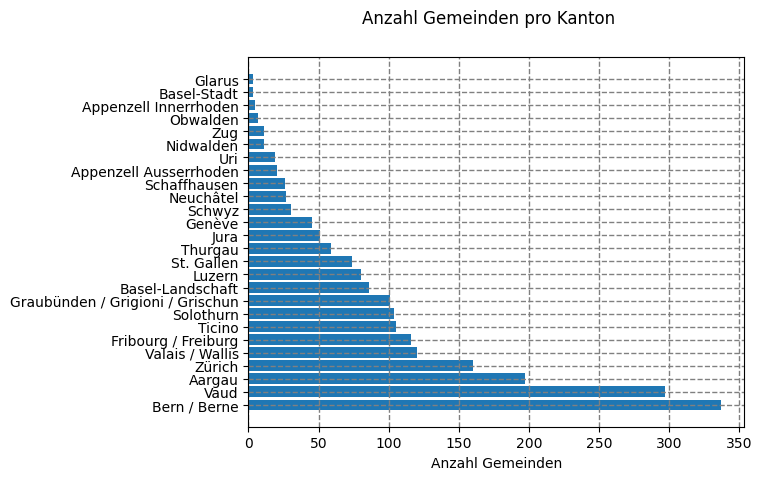

In [14]:
plt.barh(df["cantonName"], df["numberOfMunies"])
plt.suptitle("Anzahl Gemeinden pro Kanton")
plt.xlabel("Anzahl Gemeinden")
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

### Durchschnittliche Grösse der aktuellen Gemeinden pro Kanton

Die nachfolgende Abfrage zeigt, wie Zusatzinformationen aus anderen Triple-Stores mit einer einzigen SPARQL Query eingebunden werden können (sog. "Federated-Query"). Dazu wird die `SERVICE` Konstruktion verwendet, der man den SPARQL-Endpoint eines weiteren Triple-Stores bekannt geben muss. Zusätzlich wird in dieser Abfrage auch mit Variablen-Typen via der Konstruktion `""^^type` gearbeitet. Da die für Gemeinden angegebene Fläche von einem speziellen Datentyp ist (siehe bspw. https://geo.ld.admin.ch/boundaries/municipality/351:2023), muss dieser zuerst via `xsd:string()` zu einem String konvertiert werden, bevor er über `xsd:float()` wieder in eine Zahl umgewandelt werden kann, damit die Division klappt:

In [15]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>
PREFIX purl: <http://purl.org/dc/terms/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?cantonName ?muniMeanSize
FROM <https://lindas.admin.ch/fso/register>
WHERE {
    
    ?canton schema:legalName ?cantonName.
    
    SERVICE <https://geo.ld.admin.ch/query> {
    
        ?cantonGEO schema:about ?canton;
            purl:hasVersion ?version.
        ?version purl:issued "2023-01-01"^^xsd:date.
        ?version <http://dbpedia.org/property/area> ?area.
    
    }
    
    {
        SELECT ?canton (COUNT(?muni) AS ?numberOfMunies)
        WHERE {

            ?muni a admin:PoliticalMunicipality;
                a vl:Identity;
                schema:isPartOf/schema:isPartOf ?canton.

            MINUS {?muni a vl:Deprecated}

        } GROUP BY ?canton
    
    }
    
    BIND(ROUND(xsd:float(xsd:string(?area))/?numberOfMunies) AS ?muniMeanSize).

    
} ORDER BY DESC(?muniMeanSize)

""", "https://test.lindas.admin.ch/query")

display_result(df)

,cantonName,muniMeanSize
0,Glarus,22844.0
1,Graubünden / Grigioni / Grischun,7035.0
2,Obwalden,7008.0
3,Uri,5666.0
4,Valais / Wallis,4354.0
5,Appenzell Innerrhoden,3450.0
6,Schwyz,3026.0
7,Neuchâtel,2971.0
8,St. Gallen,2741.0
9,Ticino,2678.0


### Anzahl nicht mehr aktueller Gemeinden pro Kanton

Nachfolgende SPARQL Query zeigt die verschwundenen Gemeinden pro Kanton. Hier wird wiederum mit einer Subquery Konstruktion gearbeitet - die hier allerdings nicht zwingend nötig ist: Die Gruppierung hätte direkt auf `schema:legalName` erfolgen können und nicht auf der URI des Kantons:

In [16]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?cantonName ?numberOfMunies
FROM <https://lindas.admin.ch/fso/register>
WHERE {
    
    ?canton schema:legalName ?cantonName.

    {
        SELECT ?canton (COUNT(?muni) AS ?numberOfMunies)
        WHERE {

            ?muni a admin:PoliticalMunicipality;
                a vl:Identity;
                schema:isPartOf/schema:isPartOf ?canton;
                a vl:Deprecated.

        } GROUP BY ?canton
    
    }
} ORDER BY DESC(?numberOfMunies)

""", "https://test.lindas.admin.ch/query")

display_result(df)

,cantonName,numberOfMunies
0,Fribourg / Freiburg,189
1,Ticino,167
2,Thurgau,158
3,Graubünden / Grigioni / Grischun,140
4,Vaud,106
5,Bern / Berne,76
6,Valais / Wallis,66
7,Aargau,44
8,Neuchâtel,40
9,Jura,39


Diese Abfrage zeigt, dass unterschiedliche Kantone das Fusionieren von Gemeinden sehr unterschiedlich stark fördern.

### Anzahl aktueller Bezirke pro Kanton 

Analog der obigen Abfrage kann die Anzahl der Distrikte pro Kanton abgefragt werden. Hier geht es um die aktuellen Bezirke, also können mit der Konstruktion `FILTER NOT EXISTS {?district a vl:Deprecated}` die nicht mehr aktuellen Bezirke rausgefiltert werden:

In [17]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?cantonName ?numberOfDistricts
FROM <https://lindas.admin.ch/fso/register>
WHERE {
    
    ?canton schema:legalName ?cantonName.

    {
        SELECT ?canton (COUNT(?district) AS ?numberOfDistricts)
        WHERE {

            ?district a admin:District;
                a vl:Identity;
                schema:isPartOf ?canton.

            FILTER NOT EXISTS {?district a vl:Deprecated.}

        } GROUP BY ?canton
    
    }
} ORDER BY DESC(?numberOfDistricts)

""", "https://test.lindas.admin.ch/query")

display_result(df)

,cantonName,numberOfDistricts
0,Valais / Wallis,14
1,Zürich,12
2,Aargau,12
3,Graubünden / Grigioni / Grischun,11
4,Vaud,11
5,Bern / Berne,11
6,Solothurn,10
7,St. Gallen,9
8,Ticino,9
9,Fribourg / Freiburg,8


## Zeitliche Entwicklung mit Hilfe von Gemeinde-Versionen

Wenn nicht nur der aktuelle Zustand von Interesse ist, sondern eine zeitliche Entwicklung oder ein bestimmter Zeitpunkt, muss mit den Versionen der Gemeinden gearbeitet werden:

### Gemeinden in einem Kanton zu einem bestimmten Zeitpunkt

Nachfolgende Query ermöglicht es, zu verschiedenen vorgegebenen Zeitpunkten, die Anzahl von Gemeinden in einem Kanton zu bestimmen. Mit Hilfe des Schlüsselwortes `VALUES ?variable {}` können für eine bestimmte Variable verschiedene Werte vorgegeben werden. Bei der anschliessenden Filterung nach Kalenderdaten muss berücksichtigt werden, dass die Version ein Startdatum vor dem zu betrachtenden Datum haben muss und gleichzeitig muss das Enddatum nach diesem zu betrachtenden Datum sein oder darf noch nicht existieren (was heisst, dass die Version noch aktuell ist). Dies geschieht mit `FILTER(!BOUND(?stop))`, was bedeutet, dass kein Wert für `?stop` existiert. Der doppelte Strich `||` entspricht einem logischen "Oder":

In [18]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?date ?muniVersion ?name
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    VALUES ?date {
        "2000-01-01"^^xsd:date
        "2023-01-01"^^xsd:date
    }
    
    ?muniVersion a vl:Version;
        vl:identity ?muni;
        schema:isPartOf/schema:isPartOf <https://ld.admin.ch/canton/8>;
        schema:validFrom ?start;
        schema:legalName ?name.
    ?muni a admin:PoliticalMunicipality.
        
    OPTIONAL {?muniVersion schema:validThrough ?stop.}
        
    FILTER (?date >= ?start)
    FILTER (!BOUND(?stop) || ?date <= ?stop)

}

""", "https://test.ld.admin.ch/query")

display_result(df)

,date,muniVersion,name
0,2000-01-01,https://ld.admin.ch/municipality/version/10413,Sool
1,2000-01-01,https://ld.admin.ch/municipality/version/11971,Hätzingen
2,2000-01-01,https://ld.admin.ch/municipality/version/11981,Haslen
3,2000-01-01,https://ld.admin.ch/municipality/version/12011,Filzbach
4,2000-01-01,https://ld.admin.ch/municipality/version/12070,Glarus
5,2000-01-01,https://ld.admin.ch/municipality/version/12232,Elm
6,2000-01-01,https://ld.admin.ch/municipality/version/12279,Ennenda
7,2000-01-01,https://ld.admin.ch/municipality/version/12285,Engi
8,2000-01-01,https://ld.admin.ch/municipality/version/12352,Mühlehorn
9,2000-01-01,https://ld.admin.ch/municipality/version/12418,Mitlödi


### Verlauf der Anzahl Gemeinden in der Schweiz über die Zeit

Nachfolgende Query bildet der Verlauf der Anzahl Gemeinden in der Schweiz über die Zeit ab. Dafür werden zu jedem 1. Januar die Anzahl der Gemeinden gezählt. Die Jahre seit 1960 liegen ebenfalls als Linked Data vor und zwar im `schema:DefinedTermSet` https://ld.admin.ch/time/year. Diese Jahresdaten haben einen Integer Wert unter `time:year`, der mit Hilfe von `CONCAT` zu einem Wert für den jeweiligen 1. Januar erweitert werden kann. Danach müssen die Daten noch gefiltert werden, weil diese auch in die Zukunft reichen. Dabei gibt `now()` das aktuelle Datum (und Zeit) zurück. Das resultierende Dataframe kann dann relativ einfach mit Matplotlib als Grafik dargestellt werden:

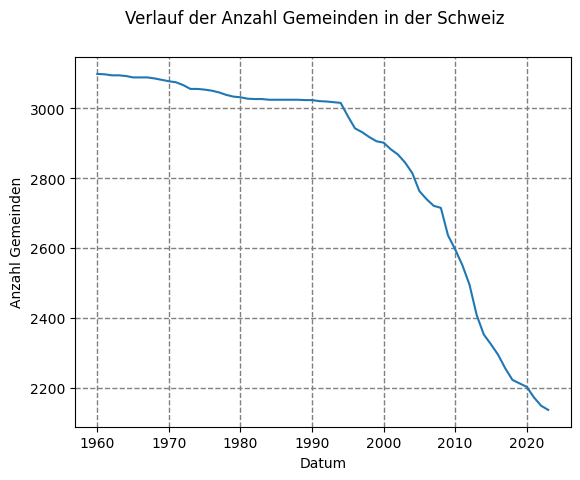

In [19]:
df = await query("""

    PREFIX vl: <https://version.link/>
    PREFIX admin: <https://schema.ld.admin.ch/>
    PREFIX schema: <http://schema.org/>
    PREFIX time: <http://www.w3.org/2006/time#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

    SELECT ?date (COUNT(?version) as ?muniCount)
    FROM <https://lindas.admin.ch/fso/register>
    FROM <https://lindas.admin.ch/meta>
    WHERE {
    
        ?year schema:inDefinedTermSet <https://ld.admin.ch/time/year>;
            time:year ?year_int.
        BIND(xsd:date(CONCAT(STR(?year_int), "-01-01")) AS ?date)
        
        FILTER(?date < xsd:date(now()))

        ?version vl:identity ?identity;
            schema:validFrom ?start.
        ?identity a admin:Municipality.
        #?identity schema:containedInPlace <https://ld.admin.ch/canton/2>. # falls Einschränkung auf einen bestimmten Kanton gewünscht ist

        OPTIONAL {?version schema:validThrough ?stop.}

        FILTER (?date >= ?start)
        FILTER (!BOUND(?stop) || ?date <= ?stop)

    } GROUP BY ?date


    """, "https://test.ld.admin.ch/query")

df["date"] = pd.to_datetime(df["date"])
plt.plot(df["date"], df["muniCount"])
plt.suptitle("Verlauf der Anzahl Gemeinden in der Schweiz")
plt.xlabel("Datum")
plt.ylabel("Anzahl Gemeinden")
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

### Änderungsgeschichte einer bestimmten Gemeinde

Folgende Query sucht zuerst nach der aktuellen Version einer Gemeinde (hier "Münsingen") und fragt dann über `vl:predecessor*` nach möglichen Vorgängern dieser Version. Der `*` bedeutet dabei, dass dieses Prädikat einmal (direkter Vorgänger) oder mehrere Male vorkommen dann (Vorgänger der Vorgänger etc.). Der `*` erlaubt auch das 'nullmalige' Vorkommen dieses Prädikats - damit wird auch die erste Version als `?participant` gezählt:

In [20]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?participant ?name
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?muni a admin:PoliticalMunicipality;
        schema:name "Münsingen";
        vl:version ?final.
    ?final vl:predecessor* ?participant.
    ?participant schema:name ?name.
}


""", "https://test.lindas.admin.ch/query")

display_result(df)

,participant,name
0,https://ld.admin.ch/municipality/version/10664,Rubigen
1,https://ld.admin.ch/municipality/version/10671,Münsingen
2,https://ld.admin.ch/municipality/version/10722,Tägertschi
3,https://ld.admin.ch/municipality/version/13438,Münsingen
4,https://ld.admin.ch/municipality/version/13445,Rubigen
5,https://ld.admin.ch/municipality/version/13447,Tägertschi
6,https://ld.admin.ch/municipality/version/13755,Trimstein
7,https://ld.admin.ch/municipality/version/15181,Münsingen
8,https://ld.admin.ch/municipality/version/15187,Tägertschi
9,https://ld.admin.ch/municipality/version/15193,Trimstein


Jetzt macht diese tabellarische Darstellung nur mässig Sinn, wichtiger wäre zu sehen, welche Gemeinde in welche übergegangen ist. Dafür eignet sich eine grafische Darstellung am besten. Zuerst muss eine Query erstellt werden, die die Versionen jeweils als `?source` und `?target` verbindet. Zwischen diesen beiden Werten besteht dann die `vl:successor` Verbindung. Damit diese Abfrage klappt, bestimmt man zuerst die "finale" Version der Gemeinde (`?final`), die von Interesse ist (hier: Münsingen). Danach sucht man sich über `vl:successor*` alle möglichen Vorgängerversionen (`?source`), die irgendwie über eine `vl:successor`-Kette mit der finalen Version in Beziehung stehen. Danach kann über ein einzelnes `vl:successor` der jeweils direkte Nachfolger aller dieser Vorgängerversionen gefunden werden. Dieser Trick "umgeht" die beschränkten Path-Query möglichkeiten von SPARQL. Damit wird aber keine vollständige Versionsgeschichte aller beteiligten Versionen erzeugt. Weiteres dazu unter [Path Queries](#Path-Queries).

In [21]:
edge_df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?source ?sourceName ?target ?targetName
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?muni a admin:PoliticalMunicipality;
        schema:name "Münsingen";
        vl:version ?final.
    ?source vl:successor* ?final;
        schema:name ?sourceName;
        vl:successor ?target.
    ?target schema:name ?targetName.
}


""", "https://test.lindas.admin.ch/query")

display_result(edge_df)

,source,sourceName,target,targetName
0,https://ld.admin.ch/municipality/version/10671,Münsingen,https://ld.admin.ch/municipality/version/13438,Münsingen
1,https://ld.admin.ch/municipality/version/10664,Rubigen,https://ld.admin.ch/municipality/version/13445,Rubigen
2,https://ld.admin.ch/municipality/version/10722,Tägertschi,https://ld.admin.ch/municipality/version/13447,Tägertschi
3,https://ld.admin.ch/municipality/version/13445,Rubigen,https://ld.admin.ch/municipality/version/13755,Trimstein
4,https://ld.admin.ch/municipality/version/13445,Rubigen,https://ld.admin.ch/municipality/version/13756,Allmendingen
5,https://ld.admin.ch/municipality/version/13445,Rubigen,https://ld.admin.ch/municipality/version/13757,Rubigen
6,https://ld.admin.ch/municipality/version/13438,Münsingen,https://ld.admin.ch/municipality/version/15181,Münsingen
7,https://ld.admin.ch/municipality/version/13447,Tägertschi,https://ld.admin.ch/municipality/version/15187,Tägertschi
8,https://ld.admin.ch/municipality/version/13755,Trimstein,https://ld.admin.ch/municipality/version/15193,Trimstein
9,https://ld.admin.ch/municipality/version/15193,Trimstein,https://ld.admin.ch/municipality/version/15517,Münsingen


In einem nächsten Schritt kann mit diesem sogenannten Edge-Dataframe weitergearbeitet werden. In diesem Dataframe sind also alle Kanten gespeichert, die in der Visualisierung dargestellt werden sollen. Die Endpunkte der Kanten dürfen nicht nur mit dem `schema:name` Attribut vorliegen, weil diese sind ja nicht eindeutig. Wir möchten aber, dass die Nodes mit ihrem jeweiligen `schema:name` Name angeschrieben werden und nicht mit der URI der Version, deshalb müssen wir ein Node-Dataframe erstellen, welches für jede URI (id) einen Namen (name) angibt (und aus welchem wir die Duplikate rausgefiltert haben):

In [22]:
ids = pd.Series.tolist(edge_df["source"]) + pd.Series.tolist(edge_df["target"])
names = pd.Series.tolist(edge_df["sourceName"]) + pd.Series.tolist(edge_df["targetName"])

node_df = pd.DataFrame(list(zip(ids, names)), columns = ["id", "name"])
node_df.drop_duplicates(inplace=True)

display_result(node_df)

,id,name
0,https://ld.admin.ch/municipality/version/10671,Münsingen
1,https://ld.admin.ch/municipality/version/10664,Rubigen
2,https://ld.admin.ch/municipality/version/10722,Tägertschi
3,https://ld.admin.ch/municipality/version/13445,Rubigen
6,https://ld.admin.ch/municipality/version/13438,Münsingen
7,https://ld.admin.ch/municipality/version/13447,Tägertschi
8,https://ld.admin.ch/municipality/version/13755,Trimstein
9,https://ld.admin.ch/municipality/version/15193,Trimstein
10,https://ld.admin.ch/municipality/version/15181,Münsingen
11,https://ld.admin.ch/municipality/version/15517,Münsingen


Danach können wir mit Hilfe des Moduls [NetworkX](https://networkx.org/) aus dem Edge-Dataframe einen Graphen erzeugen. Um für die Nodes die Attribute festzulegen (damit dann der Name der Version angezeigt werden kann), muss ein Dictionary übergeben werden, welches für jede Node-ID (die URI der Version) ein Dictionary mit den Attributen aufweist:

In [23]:
G = nx.from_pandas_edgelist(edge_df, source="source", target="target", create_using=nx.DiGraph())
node_attributes = node_df.set_index('id').to_dict("index")
display(node_attributes)
nx.set_node_attributes(G, node_attributes)

{'https://ld.admin.ch/municipality/version/10671': {'name': 'Münsingen'},
 'https://ld.admin.ch/municipality/version/10664': {'name': 'Rubigen'},
 'https://ld.admin.ch/municipality/version/10722': {'name': 'Tägertschi'},
 'https://ld.admin.ch/municipality/version/13445': {'name': 'Rubigen'},
 'https://ld.admin.ch/municipality/version/13438': {'name': 'Münsingen'},
 'https://ld.admin.ch/municipality/version/13447': {'name': 'Tägertschi'},
 'https://ld.admin.ch/municipality/version/13755': {'name': 'Trimstein'},
 'https://ld.admin.ch/municipality/version/15193': {'name': 'Trimstein'},
 'https://ld.admin.ch/municipality/version/15181': {'name': 'Münsingen'},
 'https://ld.admin.ch/municipality/version/15517': {'name': 'Münsingen'},
 'https://ld.admin.ch/municipality/version/15187': {'name': 'Tägertschi'},
 'https://ld.admin.ch/municipality/version/13756': {'name': 'Allmendingen'},
 'https://ld.admin.ch/municipality/version/13757': {'name': 'Rubigen'},
 'https://ld.admin.ch/municipality/ver

Anschliessend kann mit Hilfe des Moduls [ipycytoscape](https://ipycytoscape.readthedocs.io/en/latest/) der Graph gezeichnet werden. Dafür muss ein eine Style Liste für Nodes und Edges erstellt werden und anschliessend kann die Visualisierung gezeichnet werden. Dafür wird ein speziell auf hierarchische Beziehungen optimiertes Layout ('dagre') verwendet:

In [24]:
my_style = [
    {
        'selector': 'node',
         'style': {
            'font-family': 'helvetica',
            'font-size': '8px',
            'label': 'data(name)' #Zugriff auf das Attribut 'name' der Nodes
         }
    },
    {
        "selector": "edge.directed",
        "style": {
            "curve-style": "bezier",
            "target-arrow-shape": "triangle",
        }
    }
]

muni = cy.CytoscapeWidget()
muni.graph.add_graph_from_networkx(G, directed=True)
muni.set_style(my_style)
muni.set_layout(name = "dagre", rankDir = "LR")
muni

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'LR'}, cytoscape_style=[{'selector': 'node', 'st…

### Alle Gemeinden, die sich geteilt haben

Typischerweise fusionieren Gemeinden ja eher, also aus mehreren Gemeinden wird eine gebildet. Es gibt aber auch den anderen Weg, wo Gemeinden sich teilen. Dazu wird in der Query pro Version gruppiert und damit die Anzahl Nachfolger festgestellt. Versionen von Gemeinden haben (zumindest im Moment) keinen spezifischen Typ, um anzuzeigen, dass es sich um Gemeinden handelt (und nicht etwa um Bezirke oder Kantone), darum müssen die URI der Versionen noch nach dem Substring `"municipality"` gefiltert werden. Abschliessend wird danach gefiltert, welche Versionen mehr als einen Nachfolger haben:

In [25]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT * 
FROM <https://lindas.admin.ch/fso/register>
WHERE {
    
    ?source schema:name ?name
    
    {
        SELECT ?source (COUNT(?target) as ?successors)
        WHERE {

            ?source vl:successor ?target;

            MINUS {?source a vl:ChangeEvent}
            
            FILTER(regex(str(?source), "municipality" ) )
        } 
        GROUP BY ?source
    }
    FILTER(?successors > 1) 
} ORDER BY DESC(?successors)

""", "https://test.lindas.admin.ch/query")

display_result(df)

,source,name,successors
0,https://ld.admin.ch/municipality/version/12612,Lavertezzo,3
1,https://ld.admin.ch/municipality/version/11296,Bolligen,3
2,https://ld.admin.ch/municipality/version/14936,Cugnasco-Gerra,3
3,https://ld.admin.ch/municipality/version/13445,Rubigen,3
4,https://ld.admin.ch/municipality/version/16072,Verzasca,3
5,https://ld.admin.ch/municipality/version/14061,Weinfelden,2
6,https://ld.admin.ch/municipality/version/14063,Berg (TG),2
7,https://ld.admin.ch/municipality/version/14062,Berg (TG),2
8,https://ld.admin.ch/municipality/version/13209,Wängi,2
9,https://ld.admin.ch/municipality/version/13199,Sulgen,2


### Versionen ohne Zeitausdehnung

Es gibt Versionen, die nur gerade innerhalb eines Tages existieren. Dies ist nötig, weil zu einem bestimmten Zeitpunkt eine komplizierte Änderung passiert, die über eine Zwischenversion abgewickelt wird, die aber keine Zeitausdehnung hat. Dies passiert bspw. bei einer Fusion von verschiedenen Gemeinden, die kombiniert ist mit einem Gebietsabtausch mit einer anderen Gemeinde:

In [26]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT *
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?version a vl:Version;
        schema:name ?name;
        schema:validFrom ?start;
        schema:validThrough ?stop.
        
    FILTER(?start = ?stop)
    
}


""", "https://test.lindas.admin.ch/query")

display_result(df)

,version,name,start,stop
0,https://ld.admin.ch/municipality/version/14050,Opfershofen (TG),1994-12-31,1994-12-31
1,https://ld.admin.ch/municipality/version/14061,Weinfelden,1994-12-31,1994-12-31
2,https://ld.admin.ch/municipality/version/14062,Berg (TG),1994-12-31,1994-12-31
3,https://ld.admin.ch/municipality/version/14070,Wittenwil,1995-12-31,1995-12-31
4,https://ld.admin.ch/municipality/version/14076,Gottshaus,1995-12-31,1995-12-31
5,https://ld.admin.ch/municipality/version/14077,Bischofszell,1995-12-31,1995-12-31
6,https://ld.admin.ch/municipality/version/14080,Bischofszell,1995-12-31,1995-12-31
7,https://ld.admin.ch/municipality/version/14081,Kradolf-Schönenberg,1995-12-31,1995-12-31
8,https://ld.admin.ch/municipality/version/14091,Eschlikon,1996-12-31,1996-12-31
9,https://ld.admin.ch/municipality/version/14092,Sirnach,1996-12-31,1996-12-31


## Change Events

Um die verschiedenen Ereignisse rund um die Entwicklung von Gemeinden genauer zu untersuchen, sind die `vl:ChangeEvent` interessant:

### Beispiel Change Event 

In [27]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT *
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    <https://ld.admin.ch/municipality/changeevent/3953> ?p ?o.
}


""", "https://test.lindas.admin.ch/query")

display_result(df)

,p,o
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://ld.admin.ch/ech/71/MunicipalityChangeEvent
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.ld.admin.ch/MunicipalityChangeEvent
2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://version.link/ChangeEvent
3,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://version.link/ChangeOfName
4,http://schema.org/identifier,3953
5,http://schema.org/validFrom,2021-01-01
6,https://version.link/successor,https://ld.admin.ch/municipality/version/16610
7,https://ld.admin.ch/ech/71/date,2021-01-01
8,https://ld.admin.ch/ech/71/municipalityAdmissionNumber,3953
9,https://version.link/inVersionedIdentitySet,https://ld.admin.ch/fso/register


`vl:ChangeEvent` verbinden über `vl:predecessor` und `vl:successor` Vorgänger und Nachfolger Versionen miteinander. Ausserdem können sie über einen Change-Typ verfügen (hier: `vl:ChangeOfName`).

### Namensänderung von Gemeinden

Eine Query nach dem Change-Typ `vl:ChangeOfName` ergibt alle Gemeinden, die je ihren Namen geändert haben:

In [28]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>

SELECT ?date ?before ?after
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?version vl:endEvent ?event;
        schema:name ?before;
        vl:successor ?successor;
        vl:identity ?identity.
    ?identity a admin:Municipality.
    ?event a vl:ChangeOfName;
        schema:validFrom ?date.
    ?successor schema:name ?after.
} ORDER BY ?date


""", "https://test.lindas.admin.ch/query")

display_result(df)

,date,before,after
0,1962-01-01,Conters im Prätigau,Conters im Prättigau
1,1962-01-01,Grossbösingen,Bösingen
2,1962-01-01,Seewis im Prätigau,Seewis im Prättigau
3,1963-01-01,Disentis/Mustèr,Disentis/Mustér
4,1964-03-10,Henau,Uzwil
5,1965-01-01,Agettes,Les Agettes
6,1966-01-01,Landeron-Combes,Le Landeron
7,1966-01-01,Vaumarcus-Vernéaz,Vaumarcus
8,1969-01-01,Fellers,Falera
9,1970-01-01,Scuol/Schuls,Scuol


## eCH-0071 Daten abfragen

Das historisierte Gemeindeverzeichnis ist ursprünglich eine XML Datei, die nach dem [eCH-0071 Standard](https://www.ech.ch/de/ech/ech-0071) aufgebaut ist und [hier](https://www.bfs.admin.ch/asset/de/23886070) erhältlich ist. Ausserdem existiert eine sehr interessante [Erläuterung](https://www.bfs.admin.ch/asset/de/18484929) zu diesem Verzeichnis, das insbesondere auch die verwendeten Codes beinhaltet. Dieses XML Verzeichnis wurde ebenfalls nach Linked Data transferiert und mit den Daten gemäss version.link Standard verlinkt. Dies ermöglicht es, sehr detaillierte Angaben insbesondere bei Veränderungsprozessen zu erhalten (nicht alle Details aus dem eCH-0071 wurden nach version.link transformiert). Der Link zu den eCH-0071 Daten geschieht über `prov:hadPrimarySource`:

### Detaillierte Infos über Veränderungsprozesse

In [29]:
df = await query("""

PREFIX vl: <https://version.link/>
PREFIX admin: <https://schema.ld.admin.ch/>
PREFIX schema: <http://schema.org/>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX ech: <https://ld.admin.ch/ech/71/>

SELECT DISTINCT ?predecessor ?predecessorName ?abolitionMode ?admissionDate ?admissionMode ?successorName ?successor
FROM <https://lindas.admin.ch/fso/register>
WHERE {

    ?muni a admin:PoliticalMunicipality;
        schema:name "Klosters";
        vl:version ?final.
    ?predecessor vl:successor* ?final;
        schema:name ?predecessorName;
        vl:successor ?successor;
        prov:hadPrimarySource ?predecessorECH.
    ?successor prov:hadPrimarySource ?successorECH;
        schema:name ?successorName;
        schema:validFrom ?admissionDate.
        
    ?predecessorECH ech:municipalityAbolitionModeId ?abolitionMode.
    ?successorECH ech:municipalityAdmissionModeId ?admissionMode.

    MINUS {?predecessor a vl:ChangeEvent}
    

} ORDER BY ?admissionDate


""", "https://test.lindas.admin.ch/query")

display_result(df)

,predecessor,predecessorName,abolitionMode,admissionDate,admissionMode,successorName,successor
0,https://ld.admin.ch/municipality/version/11299,Klosters,23,1974-01-01,23,Klosters-Serneus,https://ld.admin.ch/municipality/version/13233
1,https://ld.admin.ch/municipality/version/10155,Saas,24,2001-01-01,24,Saas,https://ld.admin.ch/municipality/version/14313
2,https://ld.admin.ch/municipality/version/13233,Klosters-Serneus,24,2001-01-01,24,Klosters-Serneus,https://ld.admin.ch/municipality/version/14310
3,https://ld.admin.ch/municipality/version/14313,Saas,29,2016-01-01,26,Klosters-Serneus,https://ld.admin.ch/municipality/version/15682
4,https://ld.admin.ch/municipality/version/14310,Klosters-Serneus,26,2016-01-01,26,Klosters-Serneus,https://ld.admin.ch/municipality/version/15682
5,https://ld.admin.ch/municipality/version/15682,Klosters-Serneus,24,2017-01-01,24,Klosters-Serneus,https://ld.admin.ch/municipality/version/16070
6,https://ld.admin.ch/municipality/version/16070,Klosters-Serneus,23,2021-01-01,23,Klosters,https://ld.admin.ch/municipality/version/16610


Ein Auszug aus den Codes für `abolitionMode` und `admissionMode`:

- 20: Ersterfassung Gemeinde/Bezirk
- 21: Neugründung Gemeinde/Bezirk
- 23: Namensänderung Gemeinde
- 24: Neue Bezirks-/Kantonszuteilung
- 26: Gebietsänderung Gemeinde
- 27: Formale Neunummerierung Gemeinde/Bezirk
- 29: Aufhebung Gemeinde/Bezirk

Hier kann man somit zeitlich folgende Entwicklung sehen:

- Auf 1.1.1974 wird die Gemeinde Klosters in Klosters-Serneus umbenannt (Serneus wurde übrigens 1872 eingemeindet!)
- Auf 1.1.2001 werden im Kanton Graubünden die Bezirke geändert, was für die Gemeinde Saas und Klosters-Serneus eine neue Version ergibt
- Auf 1.1.2016 fusionieren Saas und Klosters-Serneus. Für Saas ist es eine Aufhebung (29 zu 26), für Klosters-Serneus ist es eine Gebietsänderung (26 zu 26), zusammen spricht man von einer Eingemeindung
- Auf 1.1.2017 gibt es nochmals eine Bezirksreform
- Auf 1.1.2021 wird Klosters-Serneus wieder umbenannt nach Klosters

## Path Queries

Um die vollständige Entwicklung eines "Gemeinde-Clusters" darzustellen, genügen SPARQL Property-Paths nicht. Dafür sind Path Queries nötig, welche jedoch nicht Teil der SPARQL Spezifikation sind, sondern proprietär je nach Triple Store gehandhabt werden. Der von LINDAS verwendete Stardog Triple Store hat eine [Dokumentation zu Path Queries](https://docs.stardog.com/query-stardog/path-queries). Nachfolgend wird eine Funktion `path()` definiert, welche die Path-Query an den Endpunkt schickt und als JSON formatierte Resultate entgegennimmt:

In [30]:
from pyodide.ffi import to_js
from IPython.display import JSON, HTML
from js import Object, fetch
from io import StringIO
import json

async def path(query_string, address):
    
    try:
        resp = await fetch(address,
          method="POST",
          body="query=" + query_string,
          credentials="same-origin",
          headers=Object.fromEntries(to_js({"Content-Type": "application/x-www-form-urlencoded; charset=UTF-8", 
                                            "Accept": "application/sparql-results+json" })),
        )
    except:
        raise RuntimeError("Fetch failed")
    
    
    if resp.ok:
        res = await resp.text()
        return res
    else:
        raise RuntimeError("Response status " + str(resp.status) + ":" + await resp.text())

### Änderungen von "Gemeinde-Clustern"

Nachfolgend werden Änderungen von Gemeinde-Clustern untersucht. Ein solcher Cluster besteht aus allen Versionen, die über eine Abfolge von `vl:successor` und `vl:predecessor` irgendwie miteinander in Verbindung stehen. Das nachfolgende Color-Mapping wird benötigt, um unterschiedliche Veränderungsprozesse in unterschiedlichen Farben darzustellen:

In [31]:
def color_map(code):
    if code == "29-26":
        return "blue"
    elif code == "26-26":
        return "green"
    elif code == "29-21" or code == "26-21":
        return "orange"
    else:
        return "grey"

Nachfolgend die eigentliche Path-Query, welche von der Form

```
PATHS
START ?x = <https://ld.admin.ch/municipality/version/14062>
END ?y

VIA {
    ?x ?p ?y
    
    FILTER(?p = <https://version.link/successor> || ?p = <https://version.link/predecessor>)
}
```

ist. Dabei wird als Startpunkt eine bestimmte Version festgelegt und das Ziel ist `?y`, das über eine Abfolge von Prädikaten `?p` erreicht wird, die entweder vom Typ `vl:successor` oder `vl:predecessor` sind:

In [32]:
res = await path("""

PREFIX schema: <http://schema.org/>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX ech: <https://ld.admin.ch/ech/71/>

PATHS 
START ?x = <https://ld.admin.ch/municipality/version/14062> #Berg (TG)
#START ?x = <https://ld.admin.ch/municipality/version/13445> #Rubigen
#START ?x = <https://ld.admin.ch/municipality/version/14091> #Eschlikon
#START ?x = <https://ld.admin.ch/municipality/version/12612> #Lavertezzo
END ?y 

VIA {

    ?x ?p ?y.
    
    ?x schema:name ?xName;
        prov:hadPrimarySource ?xECH;
        schema:validFrom ?xAdDate.
    ?y schema:name ?yName;
        prov:hadPrimarySource ?yECH;
        schema:validFrom ?yAdDate.
        
    OPTIONAL {?x schema:validThrough ?xAbDate.}
    OPTIONAL {?y schema:validThrough ?yAbDate.}
        
    OPTIONAL {?xECH ech:municipalityAbolitionModeId ?xECHAbId.}
    OPTIONAL {?xECH ech:municipalityAdmissionModeId ?xECHAdId.}
        
    OPTIONAL {?yECH ech:municipalityAbolitionModeId ?yECHAbId.}
    OPTIONAL {?yECH ech:municipalityAdmissionModeId ?yECHAdId.}
    
    FILTER(?p = <https://version.link/successor> || ?p = <https://version.link/predecessor>)

}


""", "https://test.lindas.admin.ch/query")

res = json.loads(res)

display(res["results"]["bindings"][0])

{'xECH': {'type': 'uri',
  'value': 'https://register.ld.admin.ch/agvch/municipalityversion/14062'},
 'yECH': {'type': 'uri',
  'value': 'https://register.ld.admin.ch/agvch/municipalityversion/12041'},
 'yECHAdId': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer',
  'type': 'literal',
  'value': '20'},
 'yName': {'type': 'literal', 'value': 'Graltshausen'},
 'yAbDate': {'datatype': 'http://www.w3.org/2001/XMLSchema#date',
  'type': 'literal',
  'value': '1994-12-31'},
 'xECHAbId': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer',
  'type': 'literal',
  'value': '26'},
 'yECHAbId': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer',
  'type': 'literal',
  'value': '29'},
 'p': {'type': 'uri', 'value': 'https://version.link/predecessor'},
 'xAdDate': {'datatype': 'http://www.w3.org/2001/XMLSchema#date',
  'type': 'literal',
  'value': '1994-12-31'},
 'yAdDate': {'datatype': 'http://www.w3.org/2001/XMLSchema#date',
  'type': 'literal',
  'value': '1960-01-01'},
 'xECHAd

Das Resultat der Path-Query ist ein JSON Objekt. Die eigentlichen Bindings befinden sich im Teil `res["results"]["bindings"]`. Die einzelnen Pfade sind jeweils durch ein leeres Dictionary `{}` abgetrennt. Dieses JSON muss aufbereitet werden. Zuerst einmal müssen alle `vl:predecessor` Verbindungen auf `vl:successor`-Richtung "gedreht" werden, weil die finale Grafik ja nur Pfeile in eine Richtung (`vl:successor`) haben soll:

In [33]:
results = []

for entry in res["results"]["bindings"]:
    if "x" in entry:
        if entry["p"]["value"] == "https://version.link/successor":
            results.append(
                {
                    "source": entry["x"]["value"], 
                    "sourceName": entry["xName"]["value"],
                    "abolitionDate": entry["xAbDate"]["value"],
                    "abolitionId": entry["xECHAbId"]["value"],
                    "admissionId": entry["yECHAdId"]["value"],
                    "admissionDate": entry["yAdDate"]["value"],
                    "targetName": entry["yName"]["value"],
                    "target": entry["y"]["value"]
                }
            )
        else:
            results.append(
                {
                    "source": entry["y"]["value"], 
                    "sourceName": entry["yName"]["value"],
                    "abolitionDate": entry["yAbDate"]["value"],
                    "abolitionId": entry["yECHAbId"]["value"],
                    "admissionId": entry["xECHAdId"]["value"],
                    "admissionDate": entry["xAdDate"]["value"],
                    "targetName": entry["xName"]["value"],
                    "target": entry["x"]["value"]
                }
            )
            
df = pd.DataFrame(results).drop_duplicates()

df["abolitionDate"] = pd.to_datetime(df["abolitionDate"])
df["admissionDate"] = pd.to_datetime(df["admissionDate"])
df["changeMode"] = df["abolitionId"] + "-" + df["admissionId"] #Kombination aus AbolitionMode und AdmissionMode
df["color"] = df["changeMode"].map(color_map) #erstellen einer neuen Spalte für die Farben der Pfeile beruhend auf dem changeMode
            
df.sort_values("admissionDate", inplace=True)

display_result(df)

,source,sourceName,abolitionDate,abolitionId,admissionId,admissionDate,targetName,target,changeMode,color
13,https://ld.admin.ch/municipality/version/11761,Andhausen,1992-12-31,29,26,1993-01-01,Berg (TG),https://ld.admin.ch/municipality/version/13753,29-26,blue
15,https://ld.admin.ch/municipality/version/11877,Berg (TG),1992-12-31,26,26,1993-01-01,Berg (TG),https://ld.admin.ch/municipality/version/13753,26-26,green
0,https://ld.admin.ch/municipality/version/12041,Graltshausen,1994-12-31,29,26,1994-12-31,Berg (TG),https://ld.admin.ch/municipality/version/14062,29-26,blue
1,https://ld.admin.ch/municipality/version/12401,Mauren,1994-12-31,29,26,1994-12-31,Berg (TG),https://ld.admin.ch/municipality/version/14062,29-26,blue
2,https://ld.admin.ch/municipality/version/13753,Berg (TG),1994-12-31,26,26,1994-12-31,Berg (TG),https://ld.admin.ch/municipality/version/14062,26-26,green
5,https://ld.admin.ch/municipality/version/11930,Guntershausen b. Birwin.,1994-12-31,29,26,1994-12-31,Berg (TG),https://ld.admin.ch/municipality/version/14062,29-26,blue
40,https://ld.admin.ch/municipality/version/10449,Weinfelden,1994-12-31,26,26,1994-12-31,Weinfelden,https://ld.admin.ch/municipality/version/14061,26-26,green
34,https://ld.admin.ch/municipality/version/10445,Weerswilen,1994-12-31,29,26,1994-12-31,Weinfelden,https://ld.admin.ch/municipality/version/14061,29-26,blue
3,https://ld.admin.ch/municipality/version/14062,Berg (TG),1994-12-31,26,26,1995-01-01,Berg (TG),https://ld.admin.ch/municipality/version/14063,26-26,green
4,https://ld.admin.ch/municipality/version/14062,Berg (TG),1994-12-31,26,26,1995-01-01,Weinfelden,https://ld.admin.ch/municipality/version/14064,26-26,green


Die anschliessende Verarbeitung über ein NetworkX Objekt und die Visualisierung mit ipycytoscape folgen dem Beispiel [hier](#Änderungsgeschichte-einer-bestimmten-Gemeinde).

In [34]:
edge_df = df

ids = pd.Series.tolist(edge_df["source"]) + pd.Series.tolist(edge_df["target"])
names = pd.Series.tolist(edge_df["sourceName"]) + pd.Series.tolist(edge_df["targetName"])

node_df = pd.DataFrame(list(zip(ids, names)), columns = ["id", "name"])
node_df.drop_duplicates(inplace=True)

G = nx.from_pandas_edgelist(edge_df, source="source", target="target", edge_attr = "color", create_using=nx.DiGraph())
nx.set_node_attributes(G, node_df.set_index('id').to_dict('index'))


my_style = [
    {
        'selector': 'node',
         'style': {
            'font-family': 'helvetica',
            'font-size': '12px',
            'label': 'data(name)'
         }
    },
    {
        "selector": "edge.directed",
        "style": {
            "curve-style": "bezier",
            "target-arrow-shape": "triangle",
            "line-color": 'data(color)',
            "target-arrow-color": 'data(color)'
        }
    }
]

muni = cy.CytoscapeWidget()
muni.graph.add_graph_from_networkx(G, directed=True)
muni.set_style(my_style)
muni.set_layout(name = "dagre", rankDir = "LR")
muni

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'LR'}, cytoscape_style=[{'selector': 'node', 'st…

Hier ist zu sehen, dass eine SPARQL Query nach allen Vorgängern von der letzten Version einer Gemeinde nicht alle beteiligten Versionen gefunden hätte, weil eine alleinige "Rückwerts-Suche" nicht gereicht hätte. In dieser Darstellung kann man die Entwicklung gut verfolgen (insbesondere mit der zusätzlichen grafischen Darstellung):

- auf 1.1.1993 wird Andhausen in die Gemeinde Berg (TG) eingemeindet
- Ende 1994 passieren verschiedene Dinge gleichzeitig:
    - die Gemeinde Weerswilen wird in die Gemeinde Weinfelden eingemeindet
    - die Gemeinden Guntershausen b. Birwin., Mauren und Graltshausen werden in die Gemeinde Berg (TG) eingemeindet
    - die umgestalteteten Gemeinden Weinfelden und Berg (TG) tauschen Land ab
- Ende 1997 passieren wiederum verschiedene Dinge gleichzeitig:
    - die Gemeinden Oberhofen b. Kreuzlingen und Illighausen fusionieren zur neuen Gemeinde Lengwil
    - die neue Gemeinde Lengwil und Berg (TG) tauschen Land ab
- auf den 1.1.2011 findet eine Änderung der Bezirke statt

Somit ist auch klar, was es mit diesen Versionen auf sich hat, die das gleiche Datum für `schema:validFrom` und `valid:Through` haben. Dies ist nötig, wenn verschiedene Wechsel "gleichzeitig" passieren. In diesem Fall also, dass Gemeinden fusionieren und gleichzeitig noch mit einer anderen Gemeinde Land abtauschen.

# Impressum

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg" /></a><br />Dieses Werk ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a>.

Autor: [Benedikt Hitz-Gamper](mailto:benedikt.hitz@bfh.ch)